In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 10)  # or however many rows you want


In [2]:
DecisionTreeDF = pd.read_csv("/Users/carolbarroco/Documents/RecomendSisKNN/TG2 RecommendSys/GitHub/T2-Indroducao-Ciencia-de-Dados/Modeling/AftDTsMPBROCKMETAL_KGDf.csv")
df_cluster_PCA_gp = pd.read_csv("/Users/carolbarroco/Documents/RecomendSisKNN/TG2 RecommendSys/GitHub/T2-Indroducao-Ciencia-de-Dados/Modeling/df_cluster_PCA_gp.csv")

In [3]:
del DecisionTreeDF[" "]
del DecisionTreeDF["Unnamed: 0"]
del df_cluster_PCA_gp ["Unnamed: 0"]


In [4]:
DecisionTreeDF


,index,node_id,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,210,6g2BiiVQqY5v1S4HIrM54F,Rodrigo Amarante,Tuyo (Narcos Theme) [Extended Version] [A Netf...,Tuyo (Narcos Theme) [Extended Version] - A Net...,66,151565,False,0.765,...,-7.806,0,0.0402,0.492000,0.366000,0.1430,0.4570,112.195,4,mpb
1,1,210,6Dc2tCivms1s2X9myWe4ni,Rodrigo Amarante,Tuyo (Narcos Theme) [A Netflix Original Series...,Tuyo (Narcos Theme) - A Netflix Original Serie...,65,89293,False,0.720,...,-13.338,0,0.0690,0.474000,0.084700,0.1550,0.5460,112.219,4,mpb
2,2,163,76HOOcFt3lKVdScmoScfz1,Djavan,"Djavan ""Ao Vivo""",Azul (Ao Vivo),49,259066,False,0.632,...,-8.658,0,0.0401,0.756000,0.000004,0.7260,0.6520,119.567,4,mpb
3,3,158,4crctLJMKJekuqQ7cQLpHV,Nicolas Candido;Olívia,Apaga a Luz (feat. Olívia),Apaga a Luz (feat. Olívia),49,216446,False,0.610,...,-10.889,0,0.0462,0.815000,0.000000,0.1230,0.5530,96.313,4,mpb
4,4,158,0XXwP0EmpOEqWxcL9aSreJ,Fábio Jr.,Fabio Jr.,Pareço um Menino,50,273906,False,0.580,...,-13.703,1,0.0295,0.596000,0.000001,0.0849,0.3730,136.408,4,mpb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2995,125,78adEMnfn1XolaOh2QAjZS,Brujeria,Brujerizmo,Laboratorio Cristalitos,20,91866,False,0.474,...,-5.850,1,0.1270,0.000432,0.030100,0.3380,0.1550,128.239,4,death-metal
2996,2996,21,53c9YHuifgAWJoqgPOgPUn,Unleashed,Gods of Death Metal,Long Before Winter's Call,0,227616,False,0.370,...,-4.465,1,0.1310,0.000078,0.006220,0.1270,0.0398,103.052,4,death-metal
2997,2997,125,6us7QqYJGMGZqej8dKCFGC,Bury Your Dead,Cover Your Tracks,Mission: Impossible,21,162973,True,0.307,...,-3.552,0,0.2790,0.000033,0.010600,0.3110,0.4880,83.527,4,death-metal
2998,2998,209,5l5XKQmo9M0XHdNAPddq0i,Surra,Bica na Cara,Vida de Babaca,22,135893,True,0.362,...,-1.722,1,0.1260,0.038000,0.000268,0.3600,0.4540,103.668,4,death-metal


In [32]:
df_cluster_PCA_gp

,index,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster_x,PC1,PC2,PCA_EuclidianDist(Xsign),1th_Boundary
0,0,66,151565,False,0.765,0.497,1,-7.806,0,0.0402,0.492000,0.366000,0.1430,0.4570,112.195,79,-0.517205,0.462498,-0.534137,-1
1,1,65,89293,False,0.720,0.422,1,-13.338,0,0.0690,0.474000,0.084700,0.1550,0.5460,112.219,79,-0.451345,0.638049,-0.669064,-1
2,2,49,259066,False,0.632,0.651,7,-8.658,0,0.0401,0.756000,0.000004,0.7260,0.6520,119.567,65,-0.495144,0.722466,-0.762924,-1
3,3,49,216446,False,0.610,0.420,4,-10.889,0,0.0462,0.815000,0.000000,0.1230,0.5530,96.313,60,-0.428134,0.813609,-0.832881,-1
4,4,50,273906,False,0.580,0.330,7,-13.703,1,0.0295,0.596000,0.000001,0.0849,0.3730,136.408,50,0.434998,0.448380,0.818698,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2995,20,91866,False,0.474,0.993,1,-5.850,1,0.1270,0.000432,0.030100,0.3380,0.1550,128.239,16,0.281309,-0.424130,0.679835,1
2996,2996,0,227616,False,0.370,0.993,7,-4.465,1,0.1310,0.000078,0.006220,0.1270,0.0398,103.052,10,0.181394,-0.440955,0.616881,1
2997,2997,21,162973,True,0.307,0.976,2,-3.552,0,0.2790,0.000033,0.010600,0.3110,0.4880,83.527,98,-0.753654,-0.515405,-0.720631,-1
2998,2998,22,135893,True,0.362,0.994,6,-1.722,1,0.1260,0.038000,0.000268,0.3600,0.4540,103.668,104,0.148060,-0.714397,0.817811,1


In [6]:
DecisionTreeDF

,index,node_id,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,210,6g2BiiVQqY5v1S4HIrM54F,Rodrigo Amarante,Tuyo (Narcos Theme) [Extended Version] [A Netf...,Tuyo (Narcos Theme) [Extended Version] - A Net...,66,151565,False,0.765,...,-7.806,0,0.0402,0.492000,0.366000,0.1430,0.4570,112.195,4,mpb
1,1,210,6Dc2tCivms1s2X9myWe4ni,Rodrigo Amarante,Tuyo (Narcos Theme) [A Netflix Original Series...,Tuyo (Narcos Theme) - A Netflix Original Serie...,65,89293,False,0.720,...,-13.338,0,0.0690,0.474000,0.084700,0.1550,0.5460,112.219,4,mpb
2,2,163,76HOOcFt3lKVdScmoScfz1,Djavan,"Djavan ""Ao Vivo""",Azul (Ao Vivo),49,259066,False,0.632,...,-8.658,0,0.0401,0.756000,0.000004,0.7260,0.6520,119.567,4,mpb
3,3,158,4crctLJMKJekuqQ7cQLpHV,Nicolas Candido;Olívia,Apaga a Luz (feat. Olívia),Apaga a Luz (feat. Olívia),49,216446,False,0.610,...,-10.889,0,0.0462,0.815000,0.000000,0.1230,0.5530,96.313,4,mpb
4,4,158,0XXwP0EmpOEqWxcL9aSreJ,Fábio Jr.,Fabio Jr.,Pareço um Menino,50,273906,False,0.580,...,-13.703,1,0.0295,0.596000,0.000001,0.0849,0.3730,136.408,4,mpb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2995,125,78adEMnfn1XolaOh2QAjZS,Brujeria,Brujerizmo,Laboratorio Cristalitos,20,91866,False,0.474,...,-5.850,1,0.1270,0.000432,0.030100,0.3380,0.1550,128.239,4,death-metal
2996,2996,21,53c9YHuifgAWJoqgPOgPUn,Unleashed,Gods of Death Metal,Long Before Winter's Call,0,227616,False,0.370,...,-4.465,1,0.1310,0.000078,0.006220,0.1270,0.0398,103.052,4,death-metal
2997,2997,125,6us7QqYJGMGZqej8dKCFGC,Bury Your Dead,Cover Your Tracks,Mission: Impossible,21,162973,True,0.307,...,-3.552,0,0.2790,0.000033,0.010600,0.3110,0.4880,83.527,4,death-metal
2998,2998,209,5l5XKQmo9M0XHdNAPddq0i,Surra,Bica na Cara,Vida de Babaca,22,135893,True,0.362,...,-1.722,1,0.1260,0.038000,0.000268,0.3600,0.4540,103.668,4,death-metal


In [33]:
df_cluster_PCA_gp_Genre = pd.merge(DecisionTreeDF["track_genre"],df_cluster_PCA_gp, right_index=True, left_index=True )
df_cluster_PCA_gp_Genre = pd.merge(DecisionTreeDF["track_id"],df_cluster_PCA_gp_Genre, right_index=True, left_index=True )
df_cluster_PCA_gp_Genre.sort_values(by="cluster_x")

,track_id,track_genre,index,popularity,duration_ms,explicit,danceability,energy,key,loudness,...,acousticness,instrumentalness,liveness,valence,tempo,cluster_x,PC1,PC2,PCA_EuclidianDist(Xsign),1th_Boundary
1562,421JZANz2BLC2loXW51XSF,rock,1562,0,118840,False,0.602,0.553,11,-9.336,...,0.108000,0.000000,0.0512,0.971,130.594,1,0.334593,0.292178,0.653542,1
1590,7vI203OsjvK2FFsfDtBYOd,rock,1590,0,118840,False,0.602,0.553,11,-9.336,...,0.108000,0.000000,0.0512,0.971,130.594,1,0.334593,0.292178,0.653542,1
1591,2kWVK6MIMVsjmmcnqYMHTk,rock,1591,0,118840,False,0.602,0.553,11,-9.336,...,0.108000,0.000000,0.0512,0.971,130.594,1,0.334593,0.292178,0.653542,1
1592,2EMYPLB3S0kgfAMmA5Y4Pz,rock,1592,0,118840,False,0.602,0.553,11,-9.336,...,0.108000,0.000000,0.0512,0.971,130.594,1,0.334593,0.292178,0.653542,1
1593,6JlGpQNMYS1iVjcGArDAfn,rock,1593,0,146093,False,0.695,0.494,9,-11.419,...,0.310000,0.000000,0.0888,0.816,127.382,1,0.400284,0.390006,0.758270,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,4GvVWN9eVDtHqQK6Pe1stT,rock,1864,2,221773,True,0.635,0.701,10,-5.969,...,0.253000,0.000049,0.1650,0.633,151.894,106,0.230453,-0.261273,0.546899,1
1866,38h5gL20FSZ9jBuhHuSOBe,rock,1866,2,221773,True,0.635,0.701,10,-5.969,...,0.253000,0.000049,0.1650,0.633,151.894,106,0.230453,-0.261273,0.546899,1
1522,7staPerb0ZxnCz5MXHDYC3,rock,1522,0,211197,True,0.576,0.869,7,-4.339,...,0.000086,0.000071,0.0573,0.746,92.538,106,0.202535,-0.467724,0.650810,1
1399,2XtsxK4mneUrhNHTRs1ZVQ,rock,1399,2,172466,True,0.766,0.882,5,-4.477,...,0.067500,0.000003,0.2810,0.547,107.933,106,0.233203,-0.483832,0.683797,1


In [56]:
def countingOcorencies(df, columnname, clusterIDs):
    # Count how many of each genre exist per cluster
    grouped = df.groupby([columnname, "track_genre"]).size().unstack(fill_value=0)

    # Make sure all expected clusters are present
    grouped = grouped.reindex(clusterIDs, fill_value=0)

    # Rename and reorder columns for clarity
    grouped = grouped.rename(columns={
        "mpb": "QntMPB",
        "rock": "QntROCK"
    })

    # Add a column for metal (any genre that's not mpb or rock)
    if "QntMPB" not in grouped.columns:
        grouped["QntMPB"] = 0
    if "QntROCK" not in grouped.columns:
        grouped["QntROCK"] = 0

    # Infer "metal" as all remaining genres
    grouped["QntMETAL"] = (
        df.groupby(columnname)
          .size()
          .reindex(clusterIDs, fill_value=0)
          - grouped["QntMPB"]
          - grouped["QntROCK"]
    )

    # Reset index so Cluster becomes a column
    grouped = grouped.reset_index().rename(columns={columnname: "Cluster"})
    grouped = grouped.drop_duplicates()

    # Count total IDs considered
    ids_count = len(df)

    return grouped, ids_count

d, i = countingOcorencies(df_cluster_PCA_gp_Genre, "cluster_x", list(df_cluster_PCA_gp_Genre["cluster_x"]))
d1, i2 = countingOcorencies(DecisionTreeDF, "node_id", (DecisionTreeDF["node_id"].sort_values()).to_list())
d_sorted = d.sort_values("Cluster")
d1_sorted = d1.sort_values("Cluster")

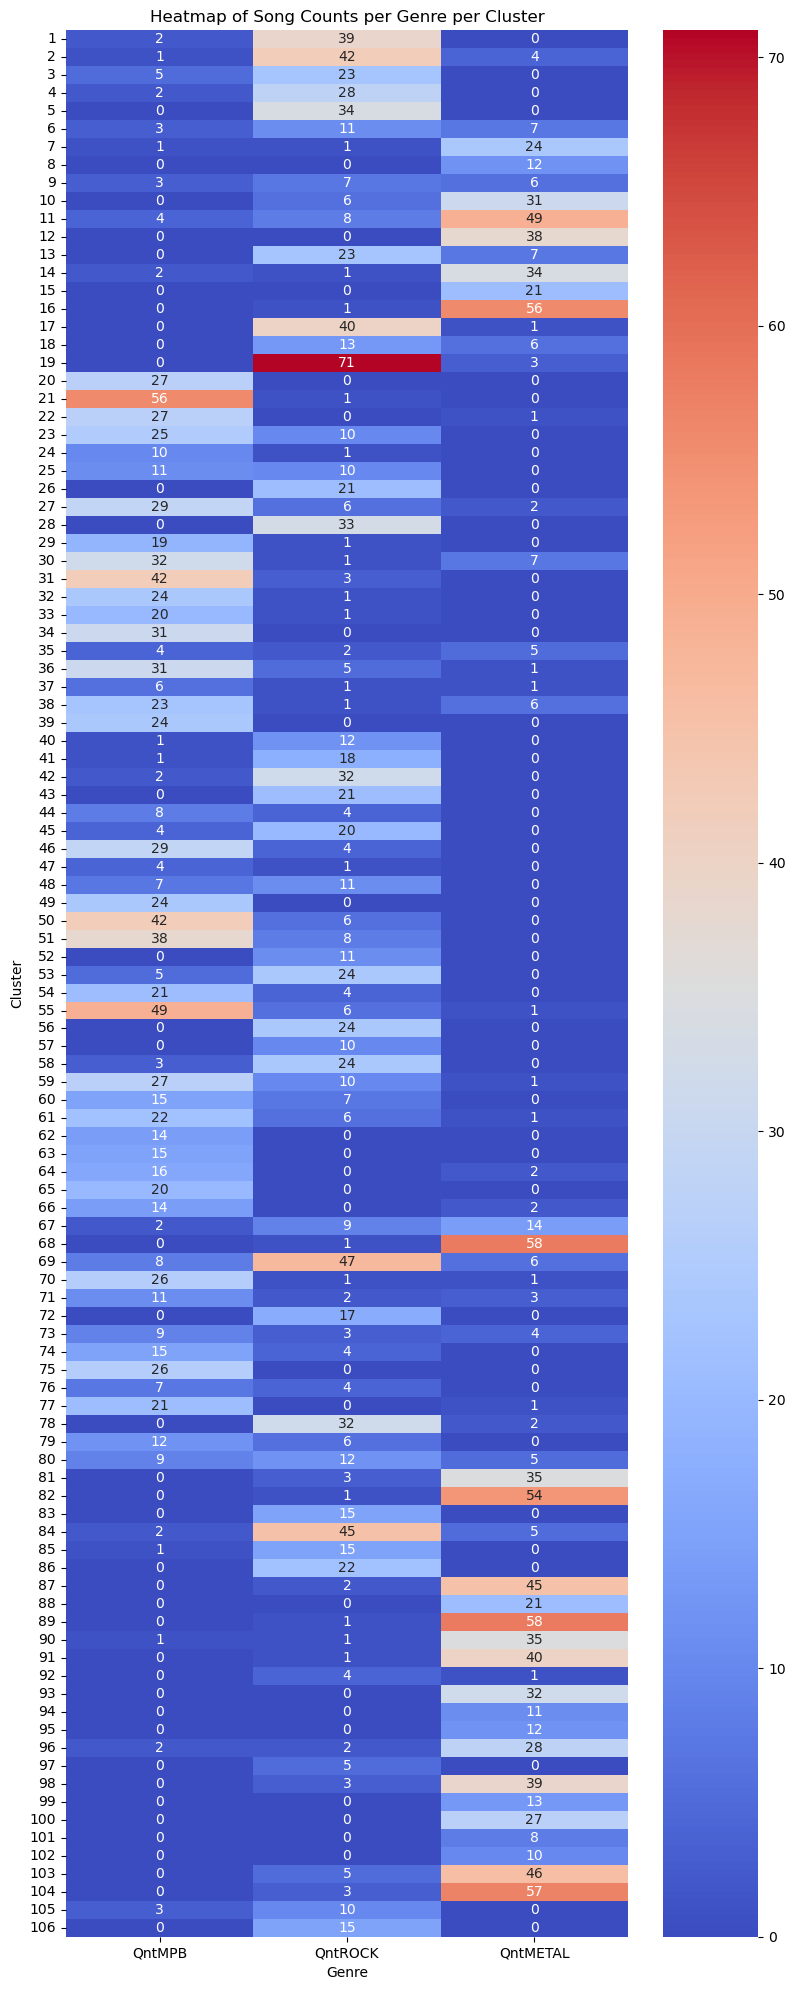

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Clean any sets (if applicable)
for col in ["QntMPB", "QntROCK", "QntMETAL"]:
    d_sorted[col] = d_sorted[col].apply(lambda x: list(x)[0] if isinstance(x, set) else x)

# Prepare for heatmap
heatmap_data = d_sorted.set_index("Cluster")[["QntMPB", "QntROCK", "QntMETAL"]]

# Plot heatmap
plt.figure(figsize=(8, 20))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt="d")

plt.title("Heatmap of Song Counts per Genre per Cluster")
plt.xlabel("Genre")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()


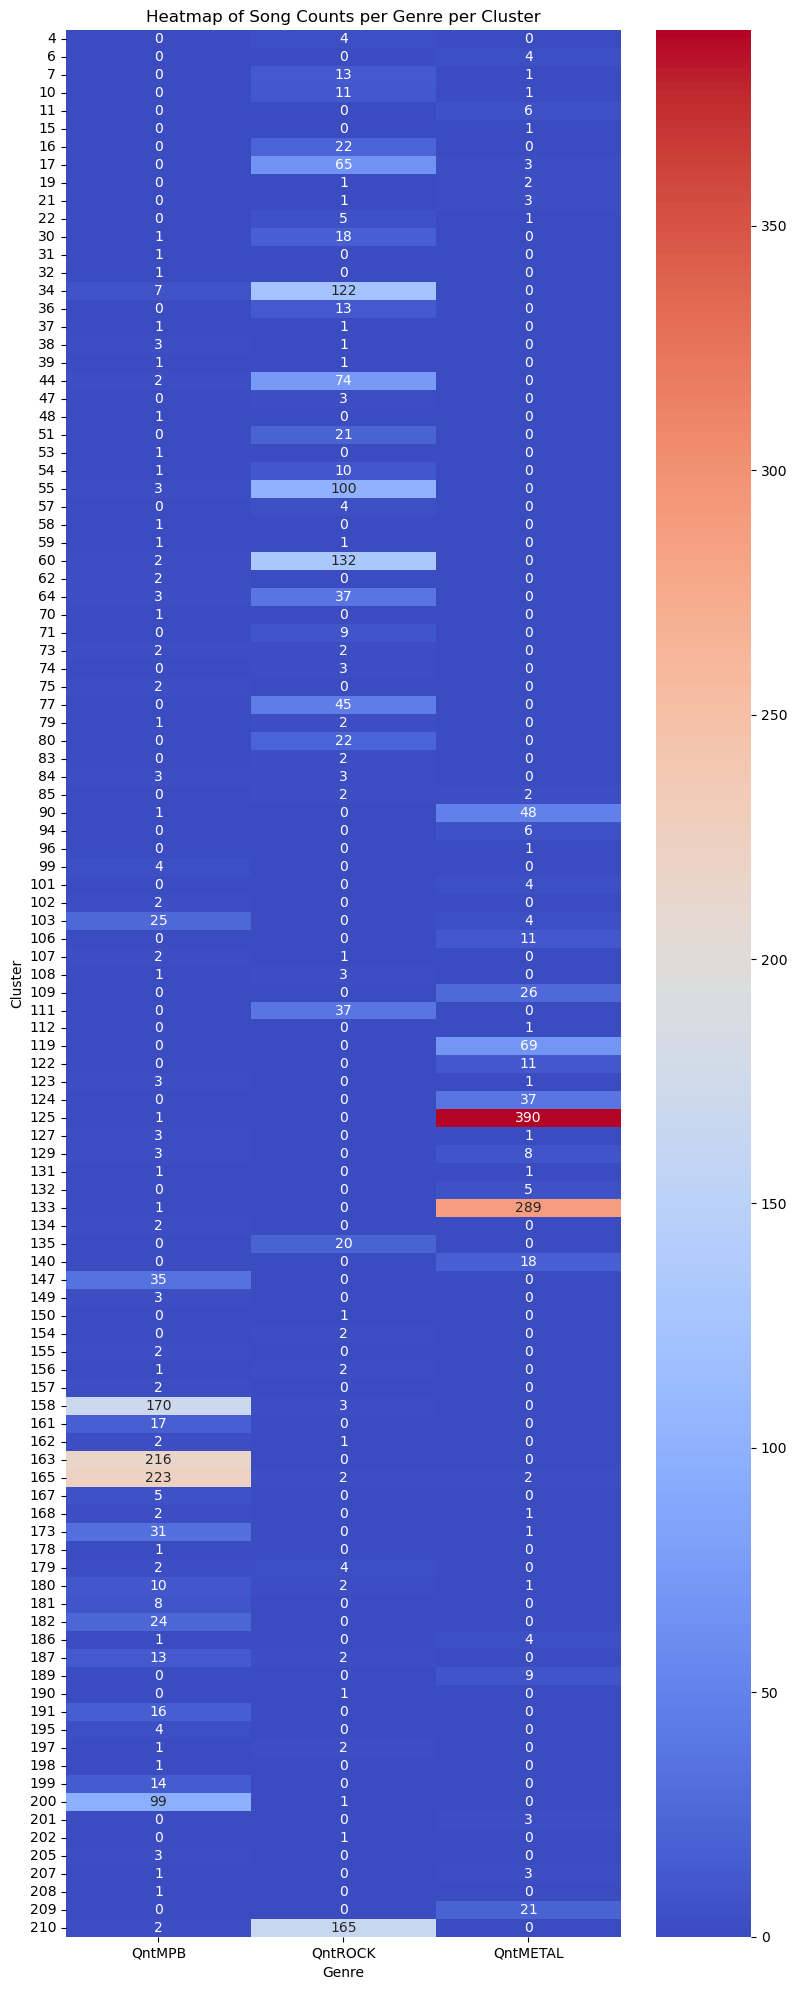

In [57]:
import seaborn as sns

# Set index to Cluster and keep only genre columns

for col in ["Cluster", "QntMPB", "QntROCK", "QntMETAL"]:
    d1[col] = d1[col].apply(lambda x: list(x)[0] if isinstance(x, set) else x)

heatmap_data = d1.set_index("Cluster")[["QntMPB", "QntROCK", "QntMETAL"]]

plt.figure(figsize=(8, 20))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt="d")

plt.title("Heatmap of Song Counts per Genre per Cluster")
plt.xlabel("Genre")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()
